In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows",1500)

In [2]:
godfather_df = pd.read_json('cleaned_godfather.json').rename(columns = {0:'Role', 1: 'Line'})

In [3]:
godfather_df['Word Count'] = [len(x.split()) for x in godfather_df['Line']]

In [4]:
word_count_df = godfather_df.groupby(['Role'])['Word Count'].sum().reset_index(name = 'Word Count')

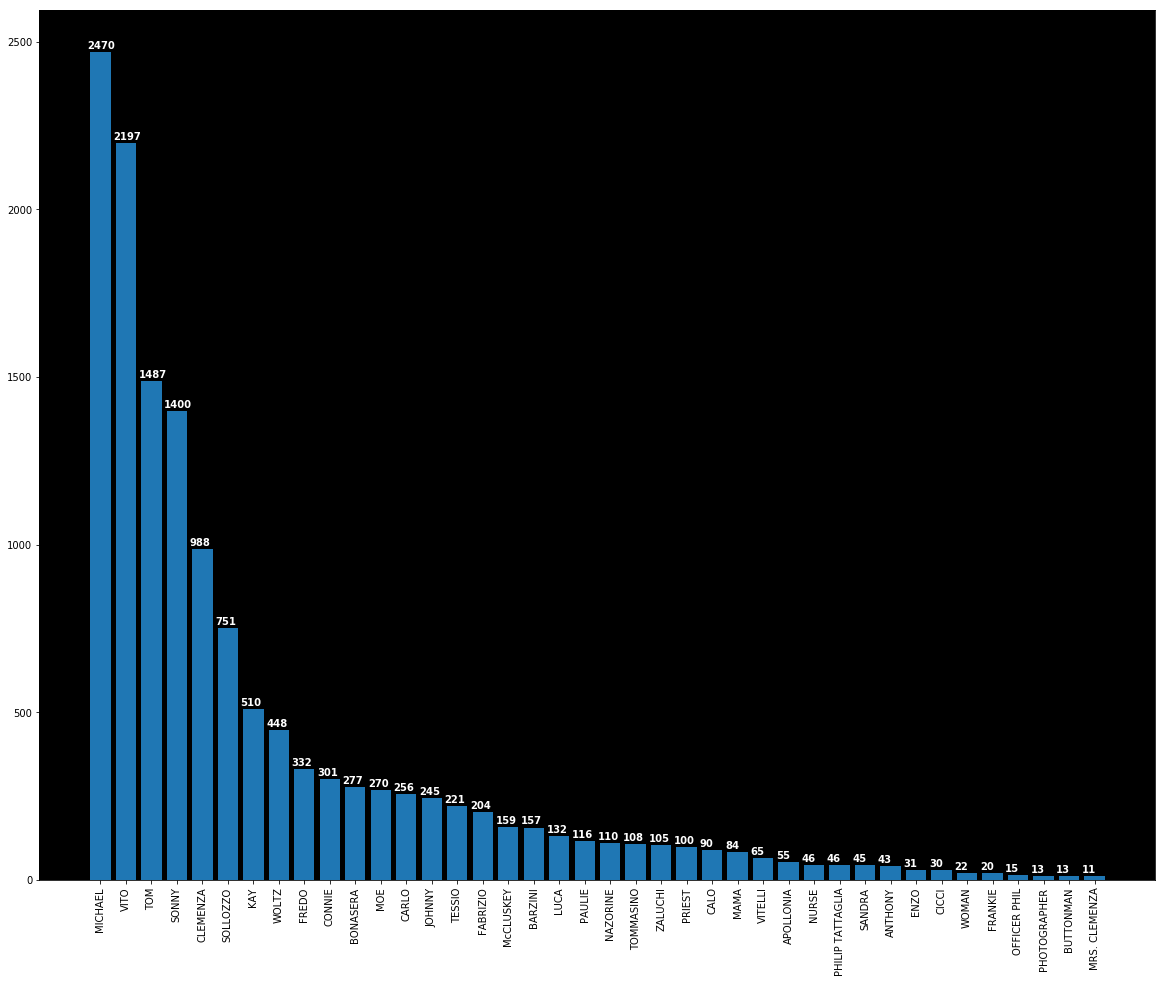

In [8]:
lst = ['CUT TO:', 'DISSOLVE TO:', 'FADE FROM BLACK:', 'OVERLAY', 'PAN', 'PAN RIGHT',
       'THE END', 'VOICE', 'VOICE ON THE PHONE']

filtered = word_count_df[~word_count_df.Role.isin(lst)]
filtered = filtered.loc[word_count_df['Word Count']>10]

fig, ax = plt.subplots(1,1,figsize =(20,16))
sorted_df = filtered.sort_values('Word Count', ascending=False)#.plot('Role', 'Word Count', kind = 'bar')
plt.xticks(rotation=90)
plt.bar('Role', 'Word Count', data=sorted_df)
ax.set_facecolor('black')

for i, v in enumerate(sorted_df['Word Count']):
    plt.text(i-.5, v+10, str(v), color='white', fontweight='bold')

In [7]:
connections_df = pd.DataFrame(columns = ['Person', 'Talked to:'])
talked_to = godfather_df['Role'].tolist()
connections_df['Person'] = godfather_df['Role']
connections_df['Talked to:'] = talked_to[1:] + ['']
connections_df

,Person,Talked to:
0,BONASERA,VITO
1,VITO,BONASERA
2,BONASERA,VITO
3,VITO,BONASERA
4,BONASERA,VITO
5,VITO,BONASERA
6,BONASERA,VITO
7,VITO,BONASERA
8,BONASERA,VITO
9,VITO,BONASERA


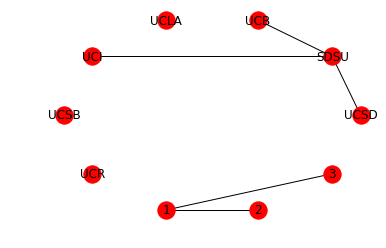

In [10]:
G = nx.Graph()

G.add_nodes_from(['UCSD','SDSU','UCB','UCLA','UCI','UCSB','UCR'])
G.add_edge('UCSD','SDSU', weight = 20.0)
G.add_edge('UCB','SDSU', weight = 20.0)
G.add_edge('UCI','SDSU', weight = 100.0)
G.add_edges_from([(1, 2), (1, 3)])

G[1][2]['weight'] = 10

H= nx.path_graph(10)
pos = nx.circular_layout(G)

nx.draw_networkx(G,pos, with_labels = True, width = 1.0)

plt.axis('off')
plt.draw()
plt.show()

In [ ]:
G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)
G.add_edge(4,1,color='black',weight=10)
G.add_edge(7,1,color='purple',weight=10)
G.add_edge(7,2,color='purple',weight=10)
G.add_edge(7,3,color='purple',weight=10)
G.add_edge(7,4,color='purple',weight=10)

pos = nx.circular_layout(G)

# G[1][2]['weight'] = 0
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx(G, pos, edges=edges, edge_color=colors, width=weights)
# plt.axis('off')